A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets.mnist import load_data

In [10]:
(x_train, y_train), (x_test, y_test) = load_data()

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

Primera CNN

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='ReLU'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [16]:
early_stop = keras.callbacks.EarlyStopping('val_accuracy', patience=5)

In [17]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=64, epochs=100, callbacks=[early_stop])

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Epoch 1/100
750/750 [==============================] - 6s 7ms/step - loss: 1.7218 - accuracy: 0.6305 - val_loss: 0.5703 - val_accuracy: 0.8294
Epoch 2/100
750/750 [==============================] - 6s 8ms/step - loss: 0.5643 - accuracy: 0.8581 - val_loss: 0.3132 - val_accuracy: 0.9168
Epoch 3/100
750/750 [==============================] - 6s 8ms/step - loss: 0.3632 - accuracy: 0.9052 - val_loss: 0.2325 - val_accuracy: 0.9405
Epoch 4/100
750/750 [==============================] - 7s 9ms/step - loss: 0.2622 - accuracy: 0.9266 - val_loss: 0.1900 - val_accuracy: 0.9483
Epoch 5/100
750/750 [==============================] - 9s 12ms/step - loss: 0.2168 - accuracy: 0.9385 - val_loss: 0.1515 - val_accuracy: 0.9575
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1848 - accuracy: 0.9470 - val_loss: 0.1477 - val_accuracy: 0.9581
Epoch 7/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1606 - accuracy: 0.9523 - val_loss: 0.1414 - val_accuracy: 0.9

In [18]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9713


[0.11357305943965912, 0.9713000059127808]

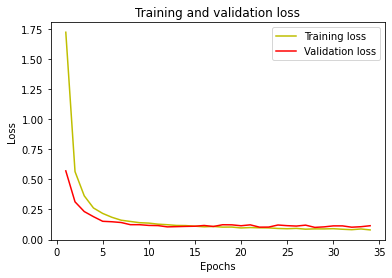

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Segunda CNN

In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='ReLU')) # Nueva capa
model.add(keras.layers.Dense(32, activation='ReLU'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=64, epochs=100, callbacks=[early_stop])

Epoch 1/100
750/750 [==============================] - 7s 9ms/step - loss: 2.3910 - accuracy: 0.1738 - val_loss: 2.0150 - val_accuracy: 0.2160
Epoch 2/100
750/750 [==============================] - 8s 11ms/step - loss: 1.8571 - accuracy: 0.2656 - val_loss: 1.6398 - val_accuracy: 0.3553
Epoch 3/100
750/750 [==============================] - 9s 11ms/step - loss: 1.3336 - accuracy: 0.4729 - val_loss: 0.9831 - val_accuracy: 0.5862
Epoch 4/100
750/750 [==============================] - 8s 11ms/step - loss: 0.9680 - accuracy: 0.6161 - val_loss: 0.8527 - val_accuracy: 0.6397
Epoch 5/100
750/750 [==============================] - 9s 12ms/step - loss: 0.8766 - accuracy: 0.6501 - val_loss: 0.7533 - val_accuracy: 0.6643
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.6114 - accuracy: 0.7729 - val_loss: 0.4930 - val_accuracy: 0.8256
Epoch 7/100
750/750 [==============================] - 8s 11ms/step - loss: 0.4796 - accuracy: 0.8349 - val_loss: 0.3894 - val_accuracy: 

In [26]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9605


[0.13797657191753387, 0.9605000019073486]

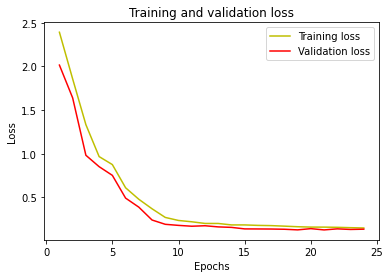

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()